# Taller de Procesamiento Digital de Imágenes y Visión por Computador

**Basado en:** Curso de Procesamiento Digital de Imágenes tomado en Univ. del Norte.

## 1. Básico de imágenes

### Importando módulos

In [1]:
import cv2 #OpenCV
import ipywidgets as widgets #Alggunos widgets
import numpy as np #Vectores y matrices
from matplotlib import pyplot as plt #Gráficos
from ipywidgets import interact, fixed #Interactuar con los widgets

%matplotlib inline

### Cargar imágenes

La resolución de la imagen es (256, 256)


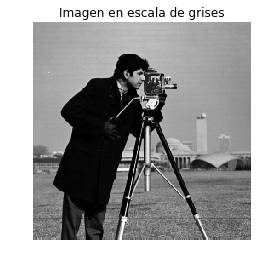

In [2]:
# Cargar una imagen es escala de grises.
img_gris = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
print("La resolución de la imagen es {0}".format(img_gris.shape))

# Visualizar una imagen.
plt.imshow(img_gris, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off');

La resolución de la imagen es (410, 275, 3)


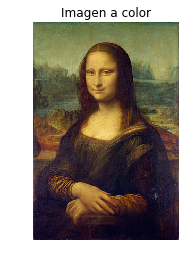

In [3]:
# Cargar una imagen a color.
img_color = cv2.imread('images/monalisa.jpg', cv2.IMREAD_COLOR)
print("La resolución de la imagen es {0}".format(img_color.shape))

# Transformar imagen BGR a RGB.
img_color = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)

# Visualizar una imagen.
plt.imshow(img_color)
plt.title('Imagen a color')
plt.axis('off');

## 2. Manipulación de imágenes

### Rotación

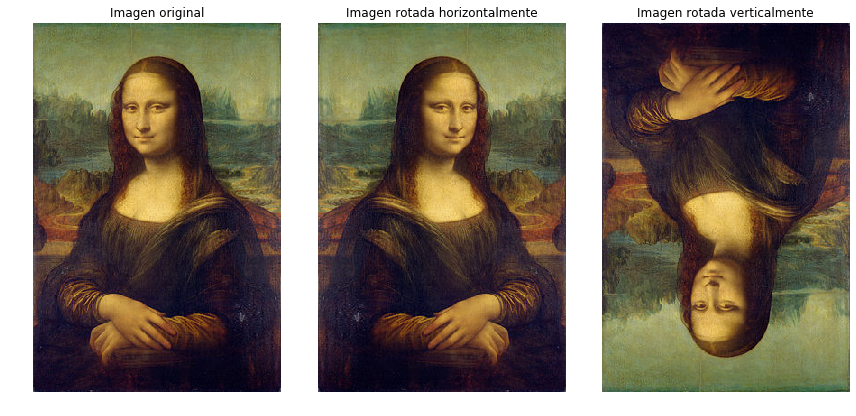

In [4]:
plt.figure(figsize=(12, 12))

#Imagen original.
plt.subplot(1,3,1)
plt.imshow(img_color)
plt.title('Imagen original')
plt.axis('off');

# Rotación horizontal.
img_color_flip_horz = cv2.flip(img_color, 1)

plt.subplot(1, 3, 2)
plt.imshow(img_color_flip_horz)
plt.title('Imagen rotada horizontalmente')
plt.axis('off');

# Rotación vertical.
img_color_flip_vert = cv2.flip(img_color, 0)
plt.subplot(1, 3, 3)
plt.imshow(img_color_flip_vert)
plt.title('Imagen rotada verticalmente')
plt.axis('off');
plt.tight_layout()


### Negativo de una imagen

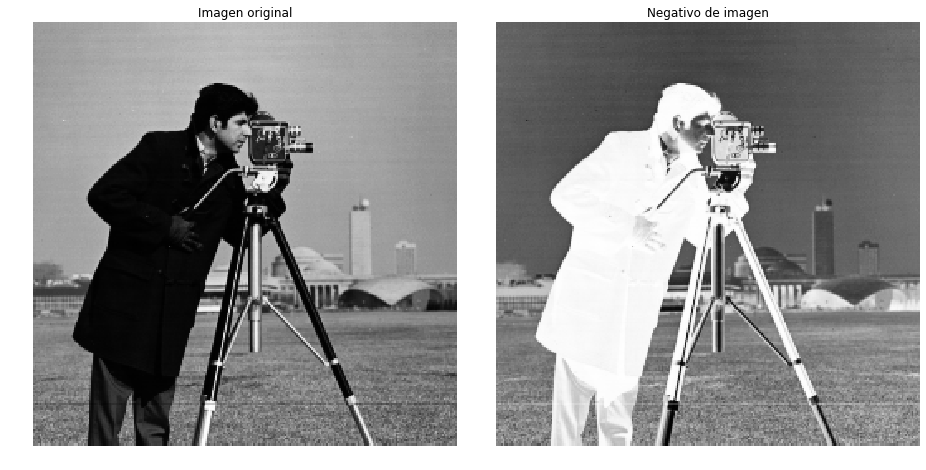

In [5]:
img = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
img_neg = 255 - img

plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen original')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(img_neg, cmap='gray')
plt.title('Negativo de imagen')
plt.axis('off');
plt.tight_layout()

### Negativo de una imagen a color

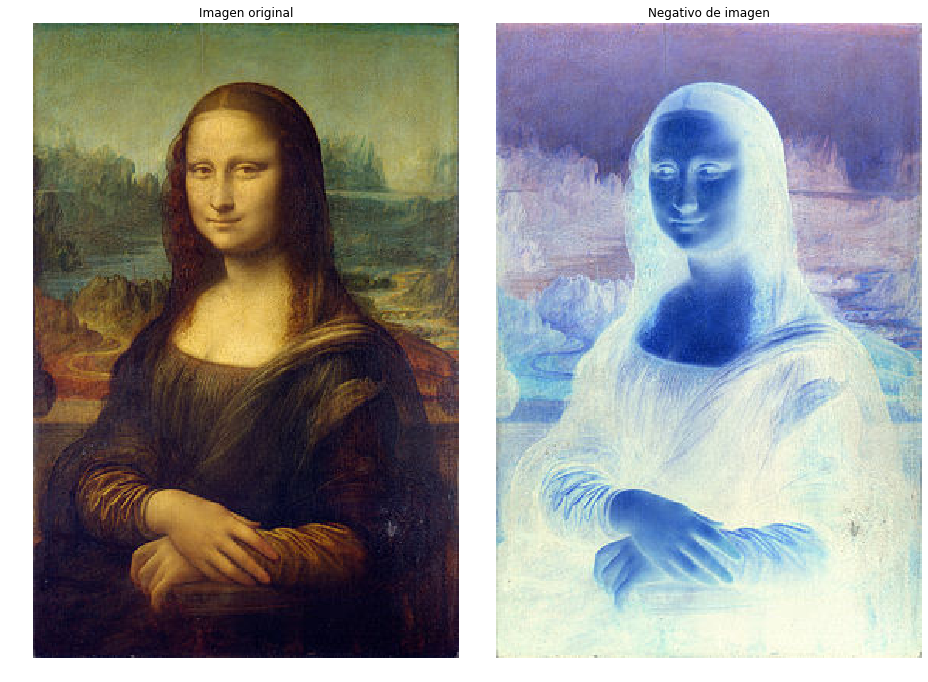

In [6]:
img = cv2.cvtColor(cv2.imread('images/monalisa.jpg', cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
img_neg = 255 - img
plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Imagen original')
plt.axis('off');

plt.subplot(1, 2, 2)
plt.imshow(img_neg)
plt.title('Negativo de imagen')
plt.axis('off');
plt.tight_layout()

### Submuestreo

In [7]:
img = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
def sub_img(img,factor):
    img_smaller=cv2.resize(img, (0,0), fx=1/(2**factor), fy=1/(2**factor)) 
    plt.figure(figsize=(13, 13))
    plt.subplot(1, 2, 1)
    plt.imshow(img,cmap='gray')
    plt.title('Imagen original')
    plt.axis('off');

    plt.subplot(1, 2, 2)
    plt.imshow(img_smaller,cmap='gray')
    plt.title('Imagen submuestrada con factor de '+ str(factor))
    plt.axis('off');

factor_slider = widgets.IntSlider(min=1, max=8, value=1, step=1, description='Factor')
interact(sub_img, img=fixed(img), factor=factor_slider);

interactive(children=(IntSlider(value=1, description='Factor', max=8, min=1), Output()), _dom_classes=('widget…

In [8]:
img = cv2.cvtColor(cv2.imread('images/monalisa.jpg', cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
def sub_img(img,factor):
    img_smaller=cv2.resize(img, (0,0), fx=1/(2**factor), fy=1/(2**factor)) 
    plt.figure(figsize=(13, 13))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Imagen original')
    plt.axis('off');

    plt.subplot(1, 2, 2)
    plt.imshow(img_smaller)
    plt.title('Imagen submuestrada con factor de '+str(factor))
    plt.axis('off')

factor_slider = widgets.IntSlider(min=1, max=8, value=1, step=1, description='Factor')
interact(sub_img, img=fixed(img), factor=factor_slider);

interactive(children=(IntSlider(value=1, description='Factor', max=8, min=1), Output()), _dom_classes=('widget…

### Reducción de niveles

In [9]:
img = cv2.imread('images/skull.bmp',cv2.IMREAD_GRAYSCALE)

def lev_img(image,factor):
    level = 2**factor

    plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(image,cmap='gray')
    plt.axis('off')

    img = image.copy()
    for i in range(0,image.shape[0]):
        for j in range(0,image.shape[1]):
            img[i,j]=image[i,j]*level/256
    img=img/np.max(img)*255
    plt.subplot(1,2,2)
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    plt.title('Levels=%s' % level)
    plt.show();

factor_slider = widgets.IntSlider(min=1, max=8, value=1, step=1, description='# Bits')
interact(lev_img, image=fixed(img), factor=factor_slider)

interactive(children=(IntSlider(value=1, description='# Bits', max=8, min=1), Output()), _dom_classes=('widget…

<function __main__.lev_img(image, factor)>

### Unión entre dos imágenes (blending)

In [10]:
def blending(img,img_2,factor):
    alpha = factor/10
    plt.figure(figsize=(15, 15))
    plt.subplot(1, 3, 1); plt.title('Imagen 1')
    plt.imshow(img); plt.axis('off');

    # Ajustar resolución entre imágenes.
    plt.subplot(1, 3, 2); plt.title('Imagen 2')
    plt.imshow(img_2); plt.axis('off');

    img_blend = cv2.addWeighted(img, alpha, img_2, 1 - alpha, 0)
    plt.subplot(1, 3, 3); plt.title('Unión de imágenes')
    plt.imshow(img_blend); plt.axis('off');

    
img = cv2.imread('images/carnaval_.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_2 = cv2.imread('images/marimonda.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

factor_slider = widgets.IntSlider(min=0, max=10, value=5, step=1, description='10 * Alpha')
interact(blending, img=fixed(img),img_2 = fixed(img_2), factor=factor_slider)

interactive(children=(IntSlider(value=5, description='10 * Alpha', max=10), Output()), _dom_classes=('widget-i…

<function __main__.blending(img, img_2, factor)>

## 3. Operaciones orientadas al punto (píxel)

### Umbralización de imágenes (segmentación)

In [11]:
img = cv2.imread('images/cameraman.png', cv2.IMREAD_GRAYSCALE)
def umbr(img,value):
    _, out_img = cv2.threshold(img, value, 255, cv2.THRESH_BINARY)

    plt.figure(figsize=(9, 9))
    plt.subplot(1, 2, 1)
    plt.imshow(img, cmap='gray'); plt.axis('off')
    plt.title('Imagen original');

    plt.subplot(1, 2, 2)
    plt.imshow(out_img, cmap='gray'); plt.axis('off')
    plt.title('Umbralización de imagen con valor de ' + str(value));
    
factor_slider = widgets.IntSlider(min=0, max=255, value=130, step=1, description='Umbral')
interact(umbr, img=fixed(img), value=factor_slider)

interactive(children=(IntSlider(value=130, description='Umbral', max=255), Output()), _dom_classes=('widget-in…

<function __main__.umbr(img, value)>

### Falso color

In [12]:
def falseColor(image, T):
    #Creating each channel 
    R = np.zeros((np.size(image,0),np.size(image,1)),dtype=np.uint8) 
    G = np.zeros((np.size(image,0),np.size(image,1)),dtype=np.uint8)
    B = np.zeros((np.size(image,0),np.size(image,1)),dtype=np.uint8)

    #Evaluate each pixel 
    for i in range(0,np.size(image,0)):
        for j in range(0, np.size(image,1)):
            if (image[i,j]<T):
                #If the intensity is lower than T, put in Blue matrix
                B[i,j] = 255
            else:
                #If the intensity is higher or equal than T, put in Green and Red matrix
                #Yellow = Green + Red 
                G[i,j] = 255
                R[i,j] = 255
    image_f = np.dstack((R,G,B)) # Put each matrix in one array
    plt.figure(figsize=(10,10)) 
    plt.subplot(1,2,1);plt.imshow(img,cmap='gray');plt.title('Original Image');plt.axis('off')
    plt.subplot(1,2,2);plt.imshow(image_f);plt.title('Image with False Color, Threshold='+str(T));plt.axis('off')
    plt.show()

img = cv2.imread('images/weld_x-ray.jpg',cv2.IMREAD_GRAYSCALE)
factor_slider = widgets.IntSlider(min=0, max=255, value=130, step=1, description='Umbral')
interact(falseColor, image=fixed(img), T=factor_slider)

interactive(children=(IntSlider(value=130, description='Umbral', max=255), Output()), _dom_classes=('widget-in…

<function __main__.falseColor(image, T)>

### Pantalla verde

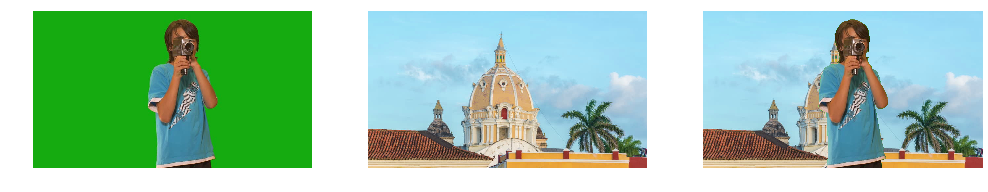

In [13]:
img = cv2.imread('images/green_screen_2.jpg')
img_bkg = cv2.imread('images/colombia_city_2.jpg')

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_bkg = cv2.cvtColor(img_bkg, cv2.COLOR_BGR2HSV)

lower_green, upper_green = np.array([50, 50, 120]), np.array([70, 255, 255]) 
green_mask = cv2.inRange(img_hsv, lower_green, upper_green) #

img_fg = cv2.bitwise_and(img_hsv, img_hsv, mask= 255 - green_mask)
img_bg = cv2.bitwise_and(img_bkg, img_bkg, mask = green_mask)

img_out = cv2.add(img_fg, img_bg)

plt.figure(figsize=(17, 17))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)); plt.axis('off');
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(img_bkg, cv2.COLOR_HSV2RGB)); plt.axis('off');
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(img_out, cv2.COLOR_HSV2RGB)); plt.axis('off');


## 4. Operaciones espaciales

### Suavizado

In [14]:
def filter_img(img, k_size):
    img = cv2.imread('images/frog.jpg', cv2.IMREAD_GRAYSCALE)
    kernel = np.ones((k_size, k_size)) * 1 / (k_size ** 2)

    img_out = cv2.filter2D(img, -1, kernel)
    plt.figure(figsize=(7, 7))
    plt.imshow(img_out, cmap='gray')
    plt.title('Imagen suavizada con kernel de tamaño {0}'.format(k_size))
    plt.axis('off');plt.show()

filter_slider = widgets.IntSlider(min=1, max=35, value=5, step=2, description='kernel')
interact(filter_img, img=fixed(img), k_size=filter_slider);

interactive(children=(IntSlider(value=5, description='kernel', max=35, min=1, step=2), Output()), _dom_classes…

### Ruido de sal y pimienta

In [15]:
img = cv2.imread('images/saltpepper.png', cv2.IMREAD_GRAYSCALE)

def salt_pepper(img,k_size):
    
    img_filt=cv2.medianBlur(img,k_size)
    plt.figure(figsize=(13, 13))
    plt.subplot(1, 2, 1)
    plt.imshow(img,cmap ='gray')
    plt.title('Imagen original')
    plt.axis('off');

    plt.subplot(1, 2, 2)
    plt.imshow(img_filt,cmap ='gray')
    plt.title('Imagen filtrada')
    plt.axis('off');


filter_slider = widgets.IntSlider(min=1, max=35, value=5, step=2, description='kernel')
interact(salt_pepper, img=fixed(img), k_size=filter_slider);

interactive(children=(IntSlider(value=5, description='kernel', max=35, min=1, step=2), Output()), _dom_classes…

### Renderizado fotorrealístico

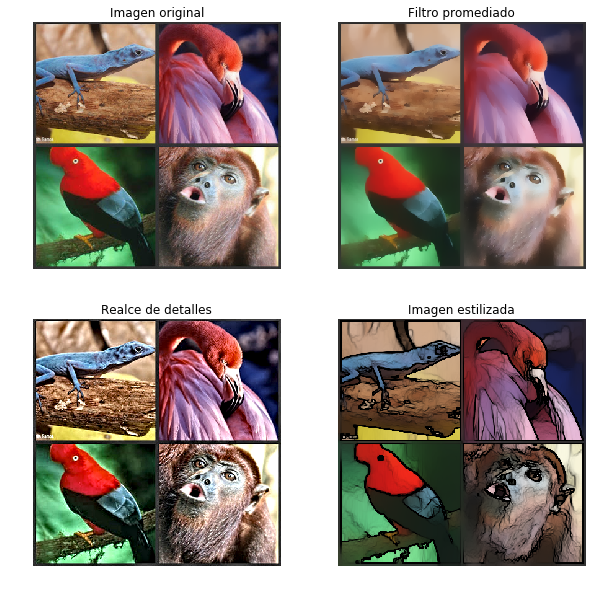

In [16]:
img = cv2.imread('images/animals.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.imshow(img); plt.title('Imagen original'); plt.axis('off')

img_out = cv2.edgePreservingFilter(img)
plt.subplot(2, 2, 2)
plt.imshow(img_out); plt.title('Filtro promediado'); plt.axis('off');

img_out = cv2.detailEnhance(img);
plt.subplot(2, 2, 3)
plt.imshow(img_out); plt.title('Realce de detalles'); plt.axis('off');

cv2.stylization(img,img_out);
plt.subplot(2, 2, 4)
plt.imshow(img_out); plt.title('Imagen estilizada'); plt.axis('off');


### Detección de bordes

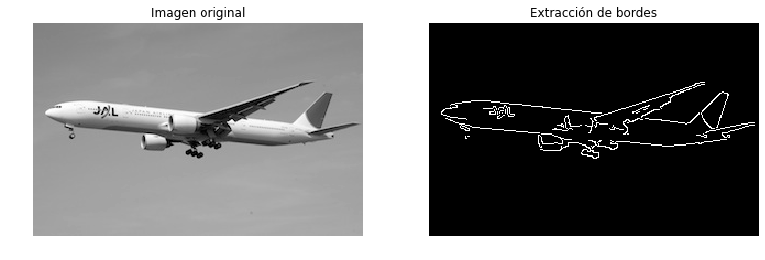

In [17]:
img = cv2.imread('images/airplane.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(13, 13))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray'); plt.axis('off'); plt.title('Imagen original');

img_edges = cv2.Canny(img, 200, 500)
plt.subplot(1, 2, 2)
plt.imshow(img_edges, cmap='gray'); plt.axis('off'); plt.title('Extracción de bordes');

### Correlación de imágenes (asociación de plantillas)

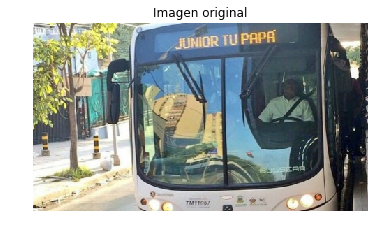

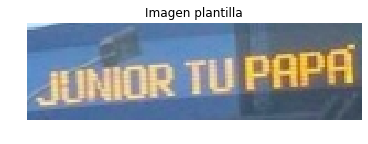

In [18]:
img = cv2.imread('images/transmetro.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

template = cv2.imread('images/template.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
height, width, _ = template.shape

plt.figure()
plt.axis('off');plt.imshow(img); plt.title('Imagen original');
plt.figure()
plt.axis('off');plt.imshow(template); plt.title('Imagen plantilla');

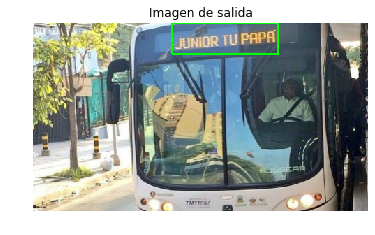

In [19]:
res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
_, _, _, top_left = cv2.minMaxLoc(res)
bottom_right = (top_left[0] + width, top_left[1] + height)
cv2.rectangle(img,top_left, bottom_right, (0, 255, 0), 2)

plt.imshow(img); plt.axis('off'); plt.title('Imagen de salida');

#### Para múltiples objetos

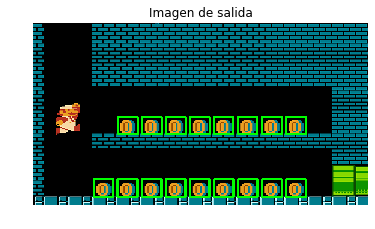

In [20]:
img = cv2.imread('images/mario.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

template = cv2.imread('images/coin.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
height, width, _ = template.shape

res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
locations = np.where(res >= 0.8)
for point in zip(locations[1], locations[0]):
    cv2.rectangle(img, point, (point[0] + width, point[1] + height), (0, 255, 0), 2)

plt.imshow(img); plt.axis('off'); plt.title('Imagen de salida');

### Erosion y dilatación

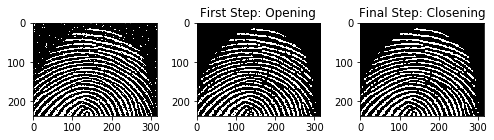

In [21]:
img = cv2.imread('images/noisy_fingerprint.jpg',cv2.IMREAD_GRAYSCALE)
#Create a square-shaped structuring element of size 3 by 3.
SqrStruct=np.ones((3,3))
#Perform opening of the input image  (erosion followed by dilation).
opened_img = cv2.morphologyEx(img, cv2.MORPH_OPEN, SqrStruct)
#Compute the closing of the result from b (dilation followed by erosion).
closed_img = cv2.morphologyEx(opened_img, cv2.MORPH_CLOSE, SqrStruct)
plt.figure(figsize=(7,7))
plt.subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(opened_img,cmap='gray')
plt.title('First Step: Opening')
plt.subplot(1,3,3)
plt.imshow(closed_img,cmap='gray')
plt.title('Final Step: Closening')
plt.tight_layout()
plt.show()

## Problem 1. 

Una compañía que embotella una variedad de químicos industriales ha escuchado
de su éxito resolviendo problemas de procesamiento digital de imágenes y lo contrata para diseñar un sistema que detecte cuando las botellas no están llenas. Las botellas aparecen como se muestra abajo a medida que avanzan a lo largo de una línea de llenado automático. Una botella se considera imperfectamente llena cuando el nivel del líquido está por debajo del punto intermedio entre la parte inferior del cuello y el hombro de la botella. El hombro se define como la región de la botella donde los lados y la porción inclinada de la botella se intersectan. Las botellas estan en movimiento, pero la compañía tiene un sistema de imágenes equipado con una iluminación fash frontal que toma las imágenes mientras avanzan las botellas, por lo que se le darán imágenes que se muestran muy parecidas a la siguiente ilustración.

<img src="images/bottles.png" />

Proponga una solución para la detección de botellas que no se llenan adecuadamente. Indique claramente todas las suposiciones que usted realice y que puedan impactar la solución que usted proponga. Implemente su
solución y aplíquelo a las imágenes <tt> bottles.tif, new_bottles.jpg </tt> y <tt> three_bottles.jpg </tt>. Visualice los resultados de su algoritmo resaltando con colores falsos las regiones que se detectan como botellas llenas correctamente y las regiones que se detectan como botellas no llenas correctamente.

In [ ]:
def BottleDet(image):
    #Smoothing image
    b_image = cv2.blur(image, (5, 5)) 
    #Image thresholding
    retVal, t_image = cv2.threshold(b_image,200,230,cv2.THRESH_BINARY)
    #Finding contours. It modifies the image so it's stored in another variable (m_image)
    m_image,contours, hierarchy = cv2.findContours(t_image,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
    #Coloring the image to make the false coloring
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    
    #Evaluate cases for each contour
    for cont in contours:
        #If area of empty space is bigger than 2800
        if(cv2.contourArea(cont) > 2800):
            #RED color
            cv2.drawContours(image, [cont], -1, (255,0,0), thickness=-1)
        else:
            #GREEN color
            cv2.drawContours(image, [cont], -1, (0,255,0), thickness=-1)
    return image

#Load image
img = cv2.imread("bottles.png", cv2.IMREAD_GRAYSCALE)
#Call function
f_img = BottleDet(img)
#Show images
plt.figure(figsize=(15,15)); 
plt.subplot(3,2,1); plt.imshow(img, cmap='gray'); plt.title("Original Image");plt.axis('Off')
plt.subplot(3,2,2); plt.imshow(f_img, cmap='gray'); plt.title("Processed Image");plt.axis('Off')

#Load image
img = cv2.imread("new_bottles.jpg", cv2.IMREAD_GRAYSCALE)
#Call function
f_img = BottleDet(img)
plt.subplot(3,2,3); plt.imshow(img, cmap='gray'); plt.title("Original Image");plt.axis('Off')
plt.subplot(3,2,4); plt.imshow(f_img, cmap='gray'); plt.title("Processed Image");plt.axis('Off')

#Load image
img = cv2.imread("three_bottles.jpg", cv2.IMREAD_GRAYSCALE)
#Call function
f_img = BottleDet(img)
plt.subplot(3,2,5); plt.imshow(img, cmap='gray'); plt.title("Original Image");plt.axis('Off')
plt.subplot(3,2,6); plt.imshow(f_img, cmap='gray'); plt.title("Processed Image");plt.axis('Off')
plt.show()

### Problema 2. Detección de rostros

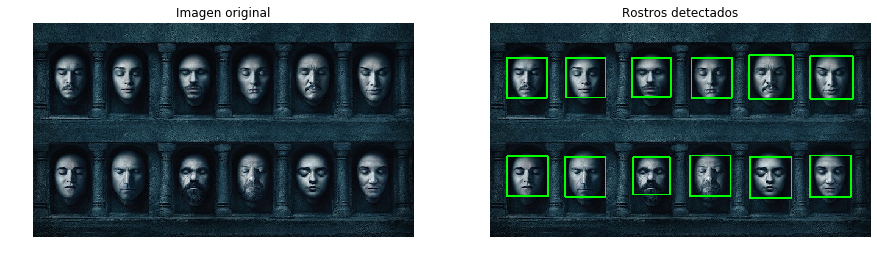

In [22]:
plt.figure(figsize=(15, 15))
img = cv2.imread('images/hall.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Imagen original')



classifier_path = 'classifiers/haarcascade_frontalface_alt.xml'
face_cascade = cv2.CascadeClassifier(classifier_path)

faces = face_cascade.detectMultiScale(img,
                                      scaleFactor=1.1,
                                      minNeighbors=5,
                                      minSize=(30, 30))
for face_coords in faces:
    x_point, y_point, width, height = face_coords
    cv2.rectangle(img, (x_point, y_point), (x_point + width, y_point + height), (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(img)
plt.axis('off')
plt.title('Rostros detectados');